<a href="https://colab.research.google.com/github/raahatg21/Signature_Verification/blob/raahatg21-cnn-model/sigmodelv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signature Verification v1.4

## Using Transfer Learing of VGG16 and Fine Tuning

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
import keras
from keras import models, layers, optimizers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
BASE_DIR = '/content/drive/My Drive/Data_for_1'
train_dir = os.path.join(BASE_DIR, 'TrainDir')
val_dir = os.path.join(BASE_DIR, 'ValDir')
test_dir = os.path.join(BASE_DIR, 'TestDir')

In [0]:
# Printing total no of images

num = 0
for diry in ['Forged', 'Genuine']:
  num += len(os.listdir(os.path.join(train_dir, diry)))
print('Total training images: ', num)

num = 0
for diry in ['Forged', 'Genuine']:
  num += len(os.listdir(os.path.join(val_dir, diry)))
print('Total validation images: ', num)

num = 0
for diry in ['Forged', 'Genuine']:
  num += len(os.listdir(os.path.join(test_dir, diry)))
print('Total test images: ', num)


Total training images:  2701
Total validation images:  726
Total test images:  641


In [0]:
# Extraing VGG16 model

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (256, 256, 3))

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 23,103,809
Trainable params: 23,103,809
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_base.trainable = False

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
# Preprocessing using ImageDataGenerator

train_datagen = ImageDataGenerator()  # Data Augmentation here
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (256, 256), batch_size = 32, class_mode = 'binary', shuffle = True)
val_generator = test_datagen.flow_from_directory(val_dir, target_size = (256, 256), batch_size = 32, class_mode = 'binary', shuffle = True)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (256, 256), batch_size = 32, class_mode = 'binary', shuffle = True)

Found 2700 images belonging to 2 classes.
Found 726 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [0]:
# Training

history = model.fit_generator(train_generator, steps_per_epoch = 2700//32, epochs = 40, validation_data = val_generator, validation_steps = 726//32)

Epoch 1/40
84/84 [==============================] - 48s 570ms/step - loss: 3.0015 - acc: 0.8025 - val_loss: 2.3516 - val_acc: 0.8452
Epoch 2/40
84/84 [==============================] - 45s 538ms/step - loss: 2.6300 - acc: 0.8310 - val_loss: 2.5188 - val_acc: 0.8415
Epoch 3/40
84/84 [==============================] - 42s 503ms/step - loss: 2.5652 - acc: 0.8347 - val_loss: 2.5323 - val_acc: 0.8357
Epoch 4/40
84/84 [==============================] - 42s 503ms/step - loss: 2.6191 - acc: 0.8320 - val_loss: 3.6532 - val_acc: 0.7709
Epoch 5/40
84/84 [==============================] - 42s 502ms/step - loss: 2.4661 - acc: 0.8428 - val_loss: 3.0800 - val_acc: 0.8055
Epoch 6/40
84/84 [==============================] - 42s 503ms/step - loss: 2.3641 - acc: 0.8498 - val_loss: 2.0693 - val_acc: 0.8646
Epoch 7/40
84/84 [==============================] - 42s 503ms/step - loss: 2.0667 - acc: 0.8683 - val_loss: 2.4064 - val_acc: 0.8487
Epoch 8/40
84/84 [==============================] - 42s 503ms/step - 

In [0]:
epochs = range(1, 41)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

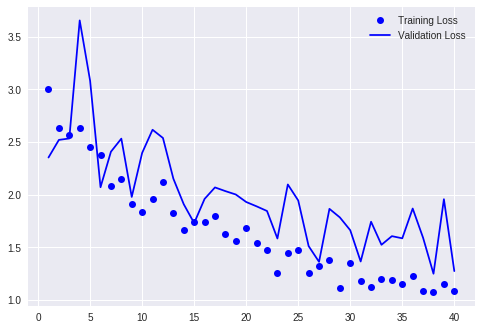

In [0]:
# Training vs Validation Loss

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend()
plt.show()

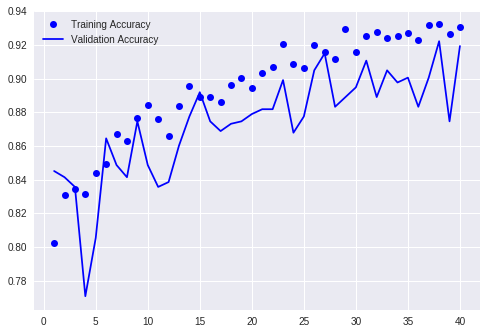

In [0]:
# Training vs Validation Accuracy

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend()
plt.show()


In [0]:
# Unfreezing the final Conv Block

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch = 2700//32, epochs = 25, validation_data = val_generator, validation_steps = 726//32)

Epoch 1/25
84/84 [==============================] - 44s 519ms/step - loss: 0.9211 - acc: 0.9423 - val_loss: 1.4945 - val_acc: 0.9049
Epoch 2/25
84/84 [==============================] - 42s 503ms/step - loss: 0.9385 - acc: 0.9408 - val_loss: 1.4323 - val_acc: 0.9107
Epoch 3/25
84/84 [==============================] - 42s 503ms/step - loss: 1.0861 - acc: 0.9314 - val_loss: 1.3669 - val_acc: 0.9107
Epoch 4/25
84/84 [==============================] - 42s 502ms/step - loss: 1.0105 - acc: 0.9360 - val_loss: 1.3383 - val_acc: 0.9164
Epoch 5/25
84/84 [==============================] - 42s 503ms/step - loss: 1.0622 - acc: 0.9338 - val_loss: 1.2569 - val_acc: 0.9207
Epoch 6/25
84/84 [==============================] - 42s 503ms/step - loss: 1.0573 - acc: 0.9330 - val_loss: 1.5911 - val_acc: 0.9006
Epoch 7/25
84/84 [==============================] - 42s 502ms/step - loss: 0.9531 - acc: 0.9399 - val_loss: 1.3092 - val_acc: 0.9150
Epoch 8/25
84/84 [==============================] - 42s 504ms/step - 

In [0]:
epochs = range(1, 26)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

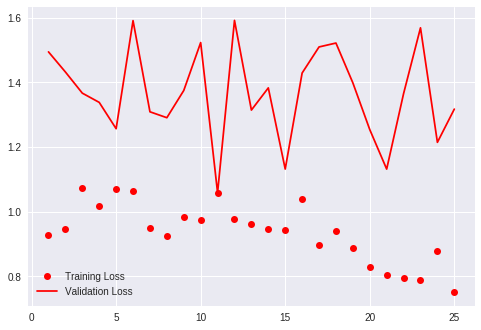

In [0]:
# Training vs Validation Loss

plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.legend()
plt.show()

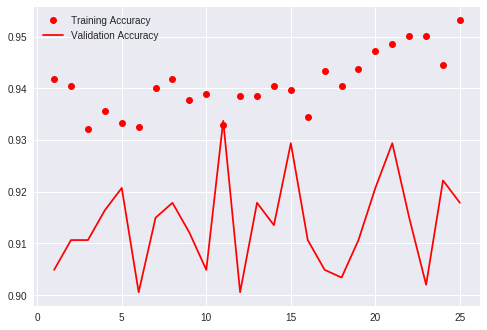

In [0]:
# Training vs Validation Accuracy

plt.plot(epochs, acc, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.legend()
plt.show()


In [0]:
# Testing

# test_loss, test_acc = model.evaluate_generator(test_generator)
# print(test_loss, test_acc)

In [0]:
model.save('/content/drive/My Drive/sigmodelv1x4.h5')